# BÀI TẬP THỰC HÀNH CHƯƠNG 2
---
**Mô tả tập dữ liệu:**

Tập dữ liệu Data_Practice.xlsx chứa dữ liệu của 961 bệnh nhân bị u vú. (chi tiết trong slide bài giảng)

Mỗi bản ghi tương ứng với một bệnh nhân, Bao gồm 6 thuộc tính:
1. PatienID: Thuộc tính cho biết mã số của bệnh nhân
2. Age: Thuộc tính cho biết tuổi của bệnh nhân, dữ liệu số
3. Shape: Thuộc tính cho biết hình dạng của khối u, bao gồm 4 giá trị: Round, Oval, Lobular, Irregular
4. Margin: Thuộc tính cho biết dạng đường biên của khối u, bao gồm 5 giá trị: Circumscribed, Microlobulated, Obscured, ill-defined, Spiculated
5. Density: Thuộc tính cho biết mật độ của khối u, bao gồm 4 giá trị: High, Iso, Low, Fat-containing
6. Target: Thuộc tính cho biết khối u là lành tính (0) - hay ác tính (1)

---
**LƯU Ý: SINH VIÊN TẠO RA MỘT FILE JUPYTER NOTEBOOK RIÊNG, CHỈ CHỨA PHẦN BÀI TẬP CHƯƠNG 2, TRÌNH BÀY TƯƠNG TỰ NHƯ VÍ DỤ 01, 02 Ở TRÊN**

**Yêu cầu 1:**
Đọc tập dữ liệu Data_Practice4.xlsx vào biến DataFrame, hiển thị thông tin của biến, 5 bản ghi đầu tiên và thống kê dữ liệu; quan sát các vấn đề với dữ liệu


In [1]:
#import các thư viện cần thiết
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#-------------------
#Tắt lỗi không quan trọng
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Đọc dữ liệu từ file
df_practice = pd.read_excel("Data/Data_Practice.xlsx")
                           #index_col=0)

#Hiển thị 5 dòng dữ liệu đầu tiên
df_practice.head()

,PatientID,Age,Shape,Margin,Density,Target
0,P1,67.0,Lobular,Spiculated,Low,1
1,P2,43.0,Round,Circumscribed,NaN,1
2,P3,58.0,Irregular,Spiculated,Low,1
3,P4,28.0,Round,Circumscribed,Low,0
4,P5,74.0,Round,Spiculated,NaN,1


In [3]:
df_practice.sample(5)

,PatientID,Age,Shape,Margin,Density,Target
658,P659,40.0,Round,Circumscribed,Low,0
114,P115,40.0,Lobular,ill-defined,NaN,0
796,P797,58.0,Irregular,ill-defined,Iso,1
590,P591,59.0,Irregular,Microlobulated,Low,0
439,P440,46.0,Irregular,Obscured,Low,1


In [4]:
df_practice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  961 non-null    object 
 1   Age        956 non-null    float64
 2   Shape      930 non-null    object 
 3   Margin     913 non-null    object 
 4   Density    885 non-null    object 
 5   Target     961 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 45.2+ KB


In [5]:
#Số lượng bị missing có trong các cột
df_practice.isnull().sum()

PatientID     0
Age           5
Shape        31
Margin       48
Density      76
Target        0
dtype: int64

- Cột Age bị missing 5 giá trị
- Cột Shape bị missing 31 giá trị
- Cột Margin bị missing 48 giá trị
- Cột Density bị missing 76 giá trị

In [6]:
df_practice.describe()

,Age,Target
count,956.000000,961.000000
mean,56.306485,0.463059
std,30.044212,0.498893
min,18.000000,0.000000
25%,45.000000,0.000000
50%,57.000000,0.000000
75%,66.000000,1.000000
max,870.000000,1.000000


In [7]:
#Dữ liệu 
df_practice.describe(include='O')

,PatientID,Shape,Margin,Density
count,961,930,913,885
unique,961,5,6,5
top,P1,Irregular,Circumscribed,Low
freq,1,399,357,797


**Yêu cầu 2:**
Thông kê dữ liệu missing cho từng thuộc tính, và liệt kê ra các bản ghi bị missing tương ứng với thuộc tính đó; suy nghĩ phương án xử lý phù hợp

In [8]:
#Hàm tính số lượng missing data
def percent_missing_value(df):
    miss_data = df.isnull().sum()#Tính số lượng missing
    miss_data_percent = miss_data*100/len(df)#Tính % missing
    miss_data_table = pd.concat([miss_data,miss_data_percent],axis=1) #Ghép 2 cột dữ liệu với nhau thành bảng
    miss_data_table = miss_data_table.rename(columns = {0:"Số giá trị missing", 1:"Tỷ lệ % missing"})#Đặt tên cho cột
    miss_data_table = miss_data_table[miss_data_table.iloc[:,1]!=0].sort_values('Tỷ lệ % missing', ascending=False).round(2)#Sắp xếp các thuộc tính bị missing trong cột tỷ lệ % missing theo thứ tự giảm dần
    print("Dữ liệu bao gồm "+str(df.shape[1])+" cột.\n\r Có "+str(miss_data_table.shape[0])+" cột bị missing dữ liệu")
    return miss_data_table

In [9]:
print("Số lượng missing data trong tập dữ liệu:")
percent_missing_value(df_practice)

Số lượng missing data trong tập dữ liệu:
Dữ liệu bao gồm 6 cột.
 Có 4 cột bị missing dữ liệu


,Số giá trị missing,Tỷ lệ % missing
Density,76,7.91
Margin,48,4.99
Shape,31,3.23
Age,5,0.52


In [10]:
#Hiển thị các giá trị ngoại lai trong trường Age
df_practice[df_practice["Age"]>=100]

,PatientID,Age,Shape,Margin,Density,Target
165,P166,870.0,Irregular,Spiculated,Low,1


In [11]:
#Hiển thị các hàng chứa giá trị null trong trường Age
df_practice.loc[df_practice["Age"].isnull()]

,PatientID,Age,Shape,Margin,Density,Target
443,P444,NaN,Irregular,Spiculated,Low,1
453,P454,NaN,Irregular,ill-defined,Low,1
683,P684,NaN,Lobular,Obscured,Low,1
884,P885,NaN,Irregular,ill-defined,Low,1
923,P924,NaN,Irregular,Obscured,Low,1


In [12]:
#Thống kê các giá trị có trong Shape
df_practice['Shape'].value_counts()


Irregular    399
Round        224
Oval         211
Lobular       95
IRREGULAR      1
Name: Shape, dtype: int64

- Giá trị IRREGULAR bị lặp lại nhưng được tính là một giá trị khác

In [13]:
#Xử lý ngoại lai của trường Shape
df_practice['Shape'].replace({"IRREGULAR":'Irregular'}, inplace=True)
df_practice['Shape'].value_counts()

Irregular    400
Round        224
Oval         211
Lobular       95
Name: Shape, dtype: int64

In [14]:
#Thống kê các giá trị có trong Margin
df_practice["Margin"].value_counts()


Circumscribed     357
ill-defined       280
Spiculated        135
Obscured          116
Microlobulated     24
SPICULATED          1
Name: Margin, dtype: int64

- Giá trị SPICULATED  bị lặp lại nhưng được tính là một giá trị khác

In [15]:
#Xử lý ngoại lai của trường Margin
df_practice['Margin'].replace({"SPICULATED":'Spiculated'}, inplace=True)
df_practice['Margin'].value_counts()

Circumscribed     357
ill-defined       280
Spiculated        136
Obscured          116
Microlobulated     24
Name: Margin, dtype: int64

In [16]:
#Thống kê các giá trị có trong Density
df_practice["Density"].value_counts()

Low               797
Iso                59
High               16
Fat-containing     12
LOW                 1
Name: Density, dtype: int64

- Giá trị LOW bị lặp lại nhưng được tính là một giá trị khác

In [17]:
#Xử lý ngoại lai của trường Shape
df_practice['Density'].replace({"LOW":'Low'}, inplace=True)
df_practice['Density'].value_counts()

Low               798
Iso                59
High               16
Fat-containing     12
Name: Density, dtype: int64

**Yêu cầu 3:** Phân tích, thống kê - xác định mức độ ảnh hưởng của các thuộc tính độc lập [Age, Shape, Margin, Density] tới thuộc tính phụ thuộc [Target] 

### Phân tích các thuộc tính quan trọng ảnh hưởng đến khả năng sống/chết (survived) của hành khách:
---
Mỗi một hành khách bao gồm thuộc tính (tương ứng với 5 cột dữ liệu)







#### a)Thuộc tính tuổi - Age:
---
Age: Thuộc tính cho biết tuổi của bệnh nhân, dữ liệu số

In [18]:
#Xử lý giá trị ngoại lai
df_practice["Age"].replace({870:87}, inplace=True)

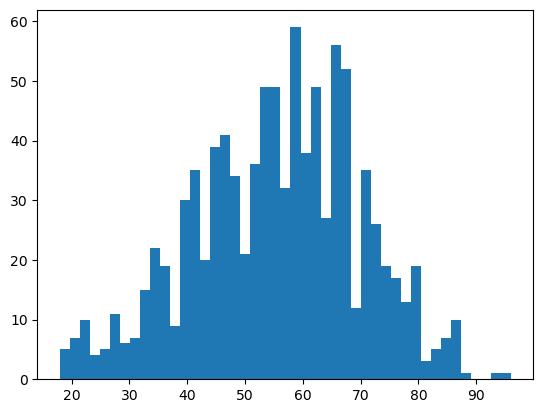

In [19]:
#Biểu đồ thể hiện sự phân bố các tuổi trong tập dữ liệu
plt.hist(df_practice.Age, bins=45)
plt.show();

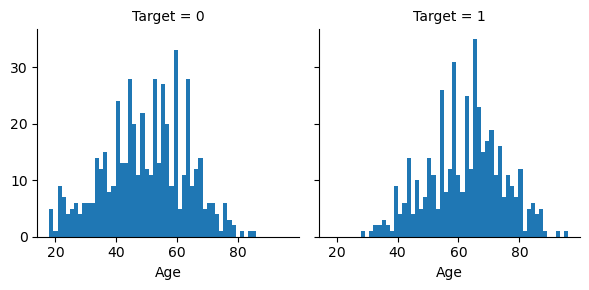

In [20]:
#Thống kê số lượng bệnh nhân bị ung thư/ không bị ung thư theo tuổi
target_age = sns.FacetGrid(df_practice, col="Target")
target_age.map(plt.hist, "Age", bins=50)
plt.show()

Quan sát dữ liệu Tuổi:
* Hầu hết các bệnh nhân đi khám trong độ tuổi từ 40 - 70 tuổi
* Độ tuổi từ 50 - 70 tuổi có tỷ lệ mắc bệnh cao hơn
* Độ tuổi <30 tuổi và >80 tuổi có tỷ lệ mắc bệnh thấp hơn
---
**Nhận xét**
* Thuộc tính tuổi có ảnh hưởng tới khả năng bị bệnh của bệnh nhân



#### b) Thuộc tính Shape
---
Shape: Thuộc tính cho biết hình dạng của khối u, bao gồm 4 giá trị: Round, Oval, Lobular, Irregular

In [21]:
df_practice[["Shape","Target"]].groupby(['Shape'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Shape,Target
0,Irregular,0.787500
1,Lobular,0.473684
3,Round,0.169643
2,Oval,0.165877


Thuộc tính Shape có ảnh hưởng đến kết quả chuẩn đoán loại u. Các bệnh nhân có khối u hình dạng Irregular(k cụ thể) có khả năng cao là u ác tính

#### c) Thuộc tính Margin
---
Margin: Thuộc tính cho biết dạng đường biên của khối u, bao gồm 5 giá trị: Circumscribed,
Microlobulated, Obscured, ill-defined, Spiculated

In [22]:
df_practice[["Margin","Target"]].groupby(['Margin'],as_index=False).mean().sort_values(by='Target', ascending=False)

,Margin,Target
3,Spiculated,0.838235
4,ill-defined,0.682143
2,Obscured,0.629310
1,Microlobulated,0.625000
0,Circumscribed,0.114846


Thuộc tính Margin có ảnh lớn tới việc chuẩn đoán u ác tính. Thuộc tính Margin là Spiculated(có gai) có khả năng là u ác tính cao hơn so với các khối u có viền khác.

#### d) Thuộc tính Density
---
Density: Thuộc tính cho biết mật độ của khối u, bao gồm 4 giá trị: High, Iso, Low, Fatcontaining

In [23]:
df_practice[['Density','Target']].groupby("Density", as_index=False).mean().sort_values('Target', ascending=False)

,Density,Target
3,Low,0.492481
1,High,0.437500
0,Fat-containing,0.416667
2,Iso,0.305085


Mật độ các khối u thấp thì khả năng là u ác tính sẽ cao hơn

In [24]:
df_practice.head()

,PatientID,Age,Shape,Margin,Density,Target
0,P1,67.0,Lobular,Spiculated,Low,1
1,P2,43.0,Round,Circumscribed,NaN,1
2,P3,58.0,Irregular,Spiculated,Low,1
3,P4,28.0,Round,Circumscribed,Low,0
4,P5,74.0,Round,Spiculated,NaN,1


**Yêu cầu 4:** Đề xuất và Áp dụng các kỹ chuẩn hóa, tiền xử lý dữ liệu phù hợp cho tập dữ liệu này, kiểm tra mức độ cân bằng dữ liệu để có thể đưa vào các mô hình học máy và lưu kết quả dữ liệu sau xử lý ra file Data_Practice_ok.csv 


### Làm sạch dữ liệu
---
#### a) Loại bỏ thuộc tính không quan trọng
---
- **Thuộc tính PatientID**: Thuộc tính này chỉ mà id, đánh số thứ tự của hành khách (Bỏ)








In [25]:
#Tạo một dataFrame mới loại bỏ những thuộc tính không quan trọng
df_patient = df_practice.drop(['PatientID'],axis = 1)
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      956 non-null    float64
 1   Shape    930 non-null    object 
 2   Margin   913 non-null    object 
 3   Density  885 non-null    object 
 4   Target   961 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 37.7+ KB


#### b) Xử lý các giá trị missing

In [26]:
percent_missing_value(df_patient)

Dữ liệu bao gồm 5 cột.
 Có 4 cột bị missing dữ liệu


,Số giá trị missing,Tỷ lệ % missing
Density,76,7.91
Margin,48,4.99
Shape,31,3.23
Age,5,0.52


##### Xử lý giá trị thiếu với thuộc tính Age
---
Lấy số tuổi trung bình của các bệnh nhân có Shape là 'irregular' và Density là 'Low' để thay thế cho các giá trị missing ở thuộc tính tuổi

In [27]:
df_patient.loc[df_patient['Age'].isnull()]

,Age,Shape,Margin,Density,Target
443,NaN,Irregular,Spiculated,Low,1
453,NaN,Irregular,ill-defined,Low,1
683,NaN,Lobular,Obscured,Low,1
884,NaN,Irregular,ill-defined,Low,1
923,NaN,Irregular,Obscured,Low,1


In [28]:
#Xử lý missing thuộc tính Age
fill_miss_age1 = df_patient[(df_patient['Shape']=='Irregular') & (df_patient['Density']=='Low') & (df_patient['Target']==1)]
fill_miss_age1

,Age,Shape,Margin,Density,Target
2,58.0,Irregular,Spiculated,Low,1
23,42.0,Irregular,ill-defined,Low,1
25,75.0,Irregular,Spiculated,Low,1
28,45.0,Irregular,Spiculated,Low,1
31,54.0,Irregular,ill-defined,Low,1
...,...,...,...,...,...
951,67.0,Irregular,Spiculated,Low,1
952,68.0,Irregular,ill-defined,Low,1
955,52.0,Irregular,ill-defined,Low,1
957,56.0,Irregular,Spiculated,Low,1


In [29]:
fill_miss_age0 = df_patient[(df_patient['Shape']=='Lobular') & (df_patient['Density']=='Low') & (df_patient['Target']==1)]
fill_miss_age0

,Age,Shape,Margin,Density,Target
0,67.0,Lobular,Spiculated,Low,1
51,80.0,Lobular,Spiculated,Low,1
90,73.0,Lobular,ill-defined,Low,1
118,55.0,Lobular,ill-defined,Low,1
139,67.0,Lobular,Spiculated,Low,1
168,54.0,Lobular,Spiculated,Low,1
188,81.0,Lobular,ill-defined,Low,1
330,85.0,Lobular,Spiculated,Low,1
357,56.0,Lobular,Circumscribed,Low,1
382,52.0,Lobular,Spiculated,Low,1


In [30]:
fill_miss_age_mean1 = round(fill_miss_age1['Age'].mean(),0)
print("Tuổi trung bình của những bệnh nhân có Shape = Irregular và Density = Low và Target = 1 ", fill_miss_age_mean1)

Tuổi trung bình của những bệnh nhân có Shape = Irregular và Density = Low và Target = 1  63.0


In [31]:
fill_miss_age_mean0 = round(fill_miss_age0['Age'].mean(),0)
print("Tuổi trung bình của những bệnh nhân có Shape = Irregular và Density = Low và Target = 0 ", fill_miss_age_mean0)

Tuổi trung bình của những bệnh nhân có Shape = Irregular và Density = Low và Target = 0  65.0


In [32]:
#Thực hiện thay thế độ tuổi trung bình là 63 vào bản ghi missing có (df_patient['Shape']=='Irregular') & (df_patient['Density']=='Low') & (df_patient['Target']==1)
df_patient.loc[(df_patient['Age'].isnull()) &(df_patient['Shape']=='Irregular') & (df_patient['Density']=='Low') & (df_patient['Target']==1),'Age']=fill_miss_age_mean1 #Chú ý 'Age': Chỉ thay thế ở cột Age thôi

In [33]:
#Thực hiện thay thế độ tuổi trung bình là 56 vào bản ghi missing có (df_patient['Shape']=='Lobular') & (df_patient['Density']=='Low') & (df_patient['Target']==0)
df_patient.loc[(df_patient['Age'].isnull()) &(df_patient['Shape']=='Lobular') & (df_patient['Density']=='Low') & (df_patient['Target']==1),'Age']=fill_miss_age_mean0 

In [34]:
df_patient.isnull().sum()

Age         0
Shape      31
Margin     48
Density    76
Target      0
dtype: int64

In [35]:
#Dữ liệu sau khi đc xử lý
df_patient.iloc[[443,453,683,884,923],:]

,Age,Shape,Margin,Density,Target
443,63.0,Irregular,Spiculated,Low,1
453,63.0,Irregular,ill-defined,Low,1
683,65.0,Lobular,Obscured,Low,1
884,63.0,Irregular,ill-defined,Low,1
923,63.0,Irregular,Obscured,Low,1


##### Xử lý giá trị thiếu với thuộc tính Shape

In [36]:
percent_missing_value(df_patient)

Dữ liệu bao gồm 5 cột.
 Có 3 cột bị missing dữ liệu


,Số giá trị missing,Tỷ lệ % missing
Density,76,7.91
Margin,48,4.99
Shape,31,3.23


In [37]:
shape_null = df_patient.loc[df_patient["Shape"].isnull()]
shape_null

,Age,Shape,Margin,Density,Target
6,70.0,NaN,NaN,Low,0
9,60.0,NaN,Spiculated,High,1
20,66.0,NaN,NaN,High,1
48,42.0,NaN,NaN,Fat-containing,0
54,53.0,NaN,Spiculated,Low,1
74,70.0,NaN,ill-defined,NaN,1
83,57.0,NaN,ill-defined,High,0
128,52.0,NaN,ill-defined,NaN,0
157,51.0,NaN,NaN,Low,0
163,53.0,NaN,ill-defined,Low,0


In [38]:
shape_null['Target'].value_counts()

0    19
1    12
Name: Target, dtype: int64

In [39]:
#Thống kê số lượng các thuộc tính có trong trường Shape
round(df_patient['Shape'].value_counts()*100/len(df_patient['Shape']),2)

Irregular    41.62
Round        23.31
Oval         21.96
Lobular       9.89
Name: Shape, dtype: float64

In [40]:
#Thay thế Irregular vào bản ghi missing
df_patient['Shape']=df_patient['Shape'].fillna('Irregular')

In [41]:
df_patient.iloc[[6,9,20,48],:]

,Age,Shape,Margin,Density,Target
6,70.0,Irregular,NaN,Low,0
9,60.0,Irregular,Spiculated,High,1
20,66.0,Irregular,NaN,High,1
48,42.0,Irregular,NaN,Fat-containing,0


In [42]:
percent_missing_value(df_patient)

Dữ liệu bao gồm 5 cột.
 Có 2 cột bị missing dữ liệu


,Số giá trị missing,Tỷ lệ % missing
Density,76,7.91
Margin,48,4.99


##### Xử lý giá trị thiếu với thuộc tính Margin


In [43]:
margin = df_patient.loc[df_patient['Margin'].isnull()]
margin

,Age,Shape,Margin,Density,Target
5,65.0,Round,NaN,Low,0
6,70.0,Irregular,NaN,Low,0
7,42.0,Round,NaN,Low,0
12,64.0,Round,NaN,Low,0
19,40.0,Round,NaN,NaN,0
20,66.0,Irregular,NaN,High,1
22,43.0,Round,NaN,NaN,0
27,63.0,Lobular,NaN,Low,0
35,77.0,Lobular,NaN,NaN,0
48,42.0,Irregular,NaN,Fat-containing,0


In [44]:
margin['Target'].value_counts()

0    37
1    11
Name: Target, dtype: int64

In [45]:
df_patient['Margin'].value_counts()

Circumscribed     357
ill-defined       280
Spiculated        136
Obscured          116
Microlobulated     24
Name: Margin, dtype: int64

In [46]:
df_patient['Margin']=df_patient['Margin'].fillna('Circumscribed')

In [47]:
#Kiểm tra các giá trị đc fill
df_patient.iloc[[662,691,723,745,891],:]

,Age,Shape,Margin,Density,Target
662,50.0,Irregular,Circumscribed,Low,1
691,72.0,Lobular,Circumscribed,Low,0
723,60.0,Lobular,Circumscribed,Fat-containing,0
745,76.0,Lobular,Circumscribed,Low,0
891,42.0,Round,Circumscribed,High,1


In [48]:
percent_missing_value(df_patient)

Dữ liệu bao gồm 5 cột.
 Có 1 cột bị missing dữ liệu


,Số giá trị missing,Tỷ lệ % missing
Density,76,7.91


In [49]:
df_patient[df_patient["Density"].isnull()]

,Age,Shape,Margin,Density,Target
1,43.0,Round,Circumscribed,NaN,1
4,74.0,Round,Spiculated,NaN,1
19,40.0,Round,Circumscribed,NaN,0
22,43.0,Round,Circumscribed,NaN,0
26,66.0,Round,Circumscribed,NaN,0
...,...,...,...,...,...
614,46.0,Irregular,Spiculated,NaN,1
627,57.0,Oval,Circumscribed,NaN,0
665,27.0,Oval,Circumscribed,NaN,0
677,57.0,Irregular,ill-defined,NaN,1


In [50]:
df_patient['Density'].value_counts()

Low               798
Iso                59
High               16
Fat-containing     12
Name: Density, dtype: int64

In [51]:
df_patient['Density']=df_patient['Density'].fillna('Low')

In [52]:
#Hiển thị các giá trị fill
df_patient.iloc[[614,627,665,677,752],:]

,Age,Shape,Margin,Density,Target
614,46.0,Irregular,Spiculated,Low,1
627,57.0,Oval,Circumscribed,Low,0
665,27.0,Oval,Circumscribed,Low,0
677,57.0,Irregular,ill-defined,Low,1
752,48.0,Irregular,ill-defined,Low,1


#### C) Rời rạc hóa dữ liệu

In [53]:
df_patient.describe()

,Age,Target
count,961.000000,961.000000
mean,55.528616,0.463059
std,14.453714,0.498893
min,18.000000,0.000000
25%,45.000000,0.000000
50%,57.000000,0.000000
75%,66.000000,1.000000
max,96.000000,1.000000


In [54]:
#Tỷ lệ bị u ác tính theo từng khoảng tuổi
n=5
temp_patient = df_patient.copy()
temp_patient['AgeBand'] = pd.cut(df_patient['Age'],n) 

temp_patient[['AgeBand','Target']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=False)

,AgeBand,Target
4,"(80.4, 96.0]",0.892857
3,"(64.8, 80.4]",0.728000
2,"(49.2, 64.8]",0.458791
1,"(33.6, 49.2]",0.269076
0,"(17.922, 33.6]",0.057143


In [55]:
temp_patient.sample(10)

,Age,Shape,Margin,Density,Target,AgeBand
919,42.0,Round,Circumscribed,Low,0,"(33.6, 49.2]"
302,46.0,Oval,Circumscribed,Iso,0,"(33.6, 49.2]"
8,57.0,Round,Spiculated,Low,1,"(49.2, 64.8]"
886,50.0,Round,Circumscribed,Low,0,"(49.2, 64.8]"
654,68.0,Oval,Circumscribed,Low,0,"(64.8, 80.4]"
506,44.0,Lobular,ill-defined,Low,1,"(33.6, 49.2]"
818,42.0,Lobular,Circumscribed,Iso,0,"(33.6, 49.2]"
901,52.0,Irregular,ill-defined,Low,1,"(49.2, 64.8]"
935,71.0,Round,Circumscribed,Low,1,"(64.8, 80.4]"
96,40.0,Round,Circumscribed,Low,0,"(33.6, 49.2]"


Tỷ lệ chuẩn đoán là u ác tính có quan hệ với độ tuổi, những người có tuổi càng cao tỷ lệ là u ác tính càng cao. Thực hiện chia dl theo từng đoạn
- Từ 80 - 96 tuổi: Tỷ lệ là u ác tính (89%)
- Từ 65 - 80 tuổi: Tỷ lệ là u ác tính (72%)
- Từ 49 - 64 tuổi: Tỷ lệ là u ác tính (46%)
- Từ 34 - 49 tuổi: Tỷ lệ là u ác tính (26%)
- Từ 18 - 34 tuổi: Tỷ lệ là u ác tính (6%)
---
**Thay thế tuổi tuyệt đối của hành khách bằng khoảng mà tuổi thuộc vào:**
- Từ 80 - 96 tuổi => Age = 4
- Từ 65 - 80 tuổi => Age = 3
- Từ 49 - 64 tuổi => Age = 2
- Từ 34 - 49 tuổi => Age = 1
- Từ 18 - 34 tuổi => Age = 0

In [56]:
temp_patient.loc[(temp_patient['Age']>=18) & (temp_patient['Age']<34), 'Age'] = 0
temp_patient.loc[(temp_patient['Age']>=34) & (temp_patient['Age']<49), 'Age'] = 1
temp_patient.loc[(temp_patient['Age']>=49) & (temp_patient['Age']<64), 'Age'] = 2
temp_patient.loc[(temp_patient['Age']>=64) & (temp_patient['Age']<80), 'Age'] = 3
temp_patient.loc[(temp_patient['Age']>=80) & (temp_patient['Age']<96), 'Age'] = 4

In [57]:
temp_patient.sample(10)

,Age,Shape,Margin,Density,Target,AgeBand
728,1.0,Oval,Circumscribed,Low,0,"(33.6, 49.2]"
52,0.0,Round,Circumscribed,Low,0,"(17.922, 33.6]"
81,1.0,Irregular,ill-defined,Iso,1,"(33.6, 49.2]"
782,2.0,Irregular,Spiculated,Low,1,"(49.2, 64.8]"
179,2.0,Irregular,ill-defined,Low,1,"(33.6, 49.2]"
677,2.0,Irregular,ill-defined,Low,1,"(49.2, 64.8]"
287,1.0,Irregular,Obscured,Low,0,"(33.6, 49.2]"
719,3.0,Round,Circumscribed,Low,0,"(64.8, 80.4]"
564,3.0,Round,ill-defined,Low,1,"(64.8, 80.4]"
141,2.0,Oval,Circumscribed,Low,0,"(49.2, 64.8]"


In [58]:
temp_patient['Age'] = temp_patient['Age'].astype(int)
temp_patient.head()

,Age,Shape,Margin,Density,Target,AgeBand
0,3,Lobular,Spiculated,Low,1,"(64.8, 80.4]"
1,1,Round,Circumscribed,Low,1,"(33.6, 49.2]"
2,2,Irregular,Spiculated,Low,1,"(49.2, 64.8]"
3,0,Round,Circumscribed,Low,0,"(17.922, 33.6]"
4,3,Round,Spiculated,Low,1,"(64.8, 80.4]"


In [59]:
temp_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Age      961 non-null    int32   
 1   Shape    961 non-null    object  
 2   Margin   961 non-null    object  
 3   Density  961 non-null    object  
 4   Target   961 non-null    int64   
 5   AgeBand  961 non-null    category
dtypes: category(1), int32(1), int64(1), object(3)
memory usage: 35.1+ KB


#### d) Chuyển đổi dữ liệu dạng object -> int

In [60]:
temp_patient["Density"].value_counts()

Low               874
Iso                59
High               16
Fat-containing     12
Name: Density, dtype: int64

In [61]:
shape = {'Irregular': 0,
        'Round': 1,
        'Oval': 2,
        'Lobular':3}
margin = {'Circumscribed':0,
         'ill-defined':1,
         'Spiculated':2,
         'Obscured':3,
         'Microlobulated':4}
density = {'Low':0,
          'Iso':1,
          'High':2,
          'Fat-containing':3}

temp_patient['Shape'] = temp_patient['Shape'].map(shape).astype(int)
temp_patient['Margin'] = temp_patient['Margin'].map(margin).astype(int)
temp_patient['Density'] = temp_patient['Density'].map(density).astype(int)

temp_patient.head()

,Age,Shape,Margin,Density,Target,AgeBand
0,3,3,2,0,1,"(64.8, 80.4]"
1,1,1,0,0,1,"(33.6, 49.2]"
2,2,0,2,0,1,"(49.2, 64.8]"
3,0,1,0,0,0,"(17.922, 33.6]"
4,3,1,2,0,1,"(64.8, 80.4]"


Do cột AgeBand k cần thiết nên xóa đi

In [62]:
temp_patient.drop(['AgeBand'],axis=1,inplace=True)
temp_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      961 non-null    int32
 1   Shape    961 non-null    int32
 2   Margin   961 non-null    int32
 3   Density  961 non-null    int32
 4   Target   961 non-null    int64
dtypes: int32(4), int64(1)
memory usage: 22.6 KB


In [63]:
temp_patient.sample(10)

,Age,Shape,Margin,Density,Target
747,2,2,0,0,0
678,2,1,0,0,1
957,2,0,2,0,1
98,2,0,1,0,0
73,3,0,1,0,1
744,0,2,0,0,0
26,3,1,0,0,0
109,0,0,1,0,1
920,1,2,0,0,0
430,1,1,0,0,0


In [64]:
#Lưu file dữ liệu đã được xử lý xong
temp_patient.to_csv('Data/Data_Practice4_ok.csv')
print('Đã lưu file vừa xử lý thành công!')

Đã lưu file vừa xử lý thành công!


### 1. Bài toán học máy


### 2. Xác định biến
---
**Xác định biến đầu vào (X) | biến đầu ra (y)**
- Biến đầu vào - Biến độc lập (X): 4 - Age; Shape; Margin; Density
- Biến đầu ra - Biến phụ thuộc (y): 01 - Target

In [65]:
df_patient.head()

,Age,Shape,Margin,Density,Target
0,67.0,Lobular,Spiculated,Low,1
1,43.0,Round,Circumscribed,Low,1
2,58.0,Irregular,Spiculated,Low,1
3,28.0,Round,Circumscribed,Low,0
4,74.0,Round,Spiculated,Low,1


In [66]:
#Các giá trị khác nhau của biến y
df_patient['Target'].unique()

array([1, 0], dtype=int64)

In [67]:
#Thống kê số lượng theo từng lớp (giá trị)
df_patient['Target'].value_counts()

0    516
1    445
Name: Target, dtype: int64

**Nhận xét biến phụ thuộc:** Biến phụ thuộc (y) có hai giá trị (0|1) 

=> Nhãn (y) đếm được -> hữu hạn

=> Học có giám sát -> Phân lớp -> Phân lớp nhị phân

### Phần bài tập chương 3

In [68]:
df_ungthu = pd.read_csv("Data/Data_Practice4_ok.csv")
df_ungthu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  961 non-null    int64
 1   Age         961 non-null    int64
 2   Shape       961 non-null    int64
 3   Margin      961 non-null    int64
 4   Density     961 non-null    int64
 5   Target      961 non-null    int64
dtypes: int64(6)
memory usage: 45.2 KB


### 1. Tách đầu vào X - Nhãn y

In [70]:
df_ungthu.columns

Index(['Unnamed: 0', 'Age', 'Shape', 'Margin', 'Density', 'Target'], dtype='object')

In [91]:
#Tách dữ liệu biến độc lập (X)
X_ungthu = df_ungthu.loc[:,['Age','Shape','Margin','Density']].values
X_ungthu.shape

(961, 4)

In [90]:
#Tách biến phụ thuộc (y)
y_ungthu = df_ungthu.iloc[:,-1].values
y_ungthu.shape

(961,)

### 2. Tách tập dữ liệu train - test

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ungthu,
                                                   y_ungthu,
                                                   test_size=0.25,
                                                   shuffle=True,
                                                   random_state=42)


print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 720
2. Kích thước tập Test    : 241


### 3. Xây dựng mô hình

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Khai báo model KNN, với các tham số mặc định
KNN_ungthu = KNeighborsClassifier(n_neighbors=5)

In [82]:
#Danh sách tham số của mô hình:
KNN_ungthu.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### 4.Huấn luyện mô hình


In [93]:
#Thực hiện huấn luyện model
KNN_ungthu.fit(X_train,y_train)

KNeighborsClassifier()

In [94]:
#Độ chính xác của model huấn luyện
kq_train = KNN_ungthu.score(X_train,y_train)
print('Độ chính xác của mô hình trên tập dữ liệu huấn luyện:', round(kq_train*100,2))

Độ chính xác của mô hình trên tập dữ liệu huấn luyện: 80.83


### 5. Đánh giá độ chính xác của mô hình trên tập test

In [100]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN_ungthu.predict(X_test)

print("Kết quả dự đoán bệnh nhân bị ung thư hay không trên tập dữ liệu TEST:")
print("Kết quả cho 10 bệnh nhân đầu tiên:")
print("Kết quả dự đoán:                  ", y_pred[:10])
print("Kết quả thực tế của bệnh nhân   : ", y_test[:10])

Kết quả dự đoán bệnh nhân bị ung thư hay không trên tập dữ liệu TEST:
Kết quả cho 10 bệnh nhân đầu tiên:
Kết quả dự đoán:                   [0 1 1 0 1 1 0 0 1 1]
Kết quả thực tế của bệnh nhân   :  [0 1 1 0 0 0 0 0 1 0]


In [101]:
#1.Đếm số mẫu dự đoán đúng:
sl_dung = accuracy_score(y_test, y_pred, 
                       normalize=False)
print('Tổng số mẫu dự đoán đúng:', sl_dung, ' /', len(y_test))

Tổng số mẫu dự đoán đúng: 196  / 241


In [103]:
#2.Tính độ chính xác %:
tyle_dung = accuracy_score(y_test, y_pred,
                       normalize=True)

print('Độ chính xác của mô hình(k=11, weights=distance):', tyle_dung)
print('Độ chính xác theo %:', round(tyle_dung*100,2))

Độ chính xác của mô hình(k=11, weights=distance): 0.8132780082987552
Độ chính xác theo %: 81.33


Confusion matrix - UNGTHU:
[[101  27]
 [ 18  95]]


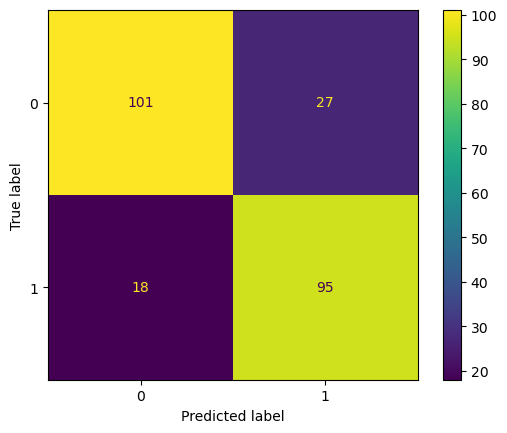

In [104]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cnf_matrix_titanic = confusion_matrix(y_test,y_pred)
print('Confusion matrix - UNGTHU:')
print(cnf_matrix_titanic)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [136]:
# Khai bảo mô hình mới bằng cách Thay đổi tham số n_neighbors, weights:
KNN_ungthu2 = KNeighborsClassifier(n_neighbors=9,
                                  p=1,
                                  weights = 'distance',
                                  algorithm='ball_tree')
#Các tham số mới của Model:
KNN_ungthu2.get_params()

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 9,
 'p': 1,
 'weights': 'distance'}

In [137]:
#Thực hiện huấn luyện với dữ liệu tập train
KNN_ungthu2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=9, p=1,
                     weights='distance')

In [138]:
#Độ chính xác của Model trên tập Huấn luyện
y_pred2 = KNN_ungthu2.score(X_train,y_train)

print('Độ chính xác trên tập huấn luyện:', round(y_pred2*100,2))

Độ chính xác trên tập huấn luyện: 83.19


In [139]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred_test2 = KNN_ungthu2.predict(X_test)

print("Kết quả dự đoán bệnh nhân bị ung thư hay không trên tập dữ liệu TEST:")
print("Kết quả cho 10 bệnh nhân đầu tiên:")
print("Kết quả dự đoán:                  ", y_pred_test2[:10])
print("Kết quả thực tế của bệnh nhân   : ", y_test[:10])

Kết quả dự đoán bệnh nhân bị ung thư hay không trên tập dữ liệu TEST:
Kết quả cho 10 bệnh nhân đầu tiên:
Kết quả dự đoán:                   [0 1 1 0 1 1 0 0 1 1]
Kết quả thực tế của bệnh nhân   :  [0 1 1 0 0 0 0 0 1 0]


In [140]:
#2.Tính độ chính xác % của kết quả dự đoán với kết quả tập test:
tyle_kq2 = accuracy_score(y_test, y_pred_test2,
                       normalize=True)

print('Độ chính xác của mô hình(k=11, weights=distance):', tyle_kq2)
print('Độ chính xác theo %:', round(tyle_kq2*100,2))

Độ chính xác của mô hình(k=11, weights=distance): 0.8132780082987552
Độ chính xác theo %: 81.33


Confusion matrix - Titanic:
[[104  24]
 [ 21  92]]


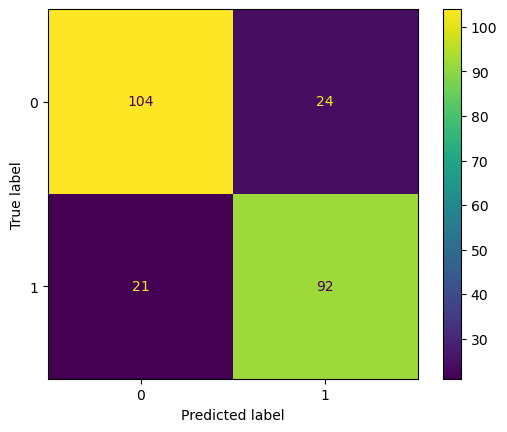

In [141]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cnf_matrix_titanic = confusion_matrix(y_test,y_pred_test2)
print('Confusion matrix - Titanic:')
print(cnf_matrix_titanic)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test2)
plt.show()

In [143]:
age = 20
shape = 1
margin = 0
density = 0
bn = np.array([(age,shape,margin,density)])
bn

array([[20,  1,  0,  0]])

In [144]:
#Sử dụng mô hình để dự đoán:
kq = KNN_ungthu2.predict(bn)
print('kết quả của hành khách thứ nhất:', kq)
if kq == 1:
    print('Bạn bị u ác tính!')
else:
    print('U của bạn là lành tính!')

kết quả của hành khách thứ nhất: [0]
U của bạn là lành tính!
